In [1]:
# run gee conda env

import pandas as pd
import ee
import geemap
print(ee.__version__) #1.5.19
print(geemap.__version__) #0.35.3


# !pip uninstall geemap
# !pip install --upgrade --force-reinstall earthengine-api==1.5.19
# !pip install --user geemap==0.35.3

/home/athapa2/.local/lib/python3.11/site-packages/geemap/conversion.py:23: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


1.6.9
0.35.3


In [2]:
# EE_PROJECT_ID = "ee-thapa2012ses"  # Change the project ID to your own
# EE_PROJECT_ID = "ee-glacial-lake"  # Change the project ID to your own
# EE_PROJECT_ID = "ee-my-aamrit2044"  # Change the project ID to your own
# EE_PROJECT_ID = "glacier-174809"  # Change the project ID to your own
EE_PROJECT_ID = "ee-athapa2"  # Change the project ID to your own

ee.Authenticate()
ee.Initialize(project=EE_PROJECT_ID)

https://insu.hal.science/insu-03859269v1/file/apme-JAMC-D-21-0091.1.pdf

# point based method

In [4]:
# y1=27.735;x1=86.898 #Mera La
x1=81.5955;y1=30.2415
my_point = ee.Geometry.Point(x1, y1)
start_date ='2024-01-01'
end_date = '2024-01-30'

start_date, end_date

('2024-01-01', '2024-01-30')

In [5]:
era5_land_daily = (
    ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
    .filter(ee.Filter.date(start_date, end_date))
    .select("temperature_2m")
)

In [6]:
# Import the ERA5 image collection.
ERA5_my_variable_my_point = era5_land_daily.getRegion(my_point,scale=1).getInfo() # scale does not matter as we are extracing for points

In [7]:
# ERA5_my_variable_my_point

In [7]:
df_ERA5_my_point_m1 = pd.DataFrame(
    ERA5_my_variable_my_point[1:],          # data (skip first row)
    columns=ERA5_my_variable_my_point[0]    # first row = header
)

df_ERA5_my_point_m1.head()

,id,longitude,latitude,time,temperature_2m
0,20240101,81.5955,30.241501,1704067200000,255.270016
1,20240102,81.5955,30.241501,1704153600000,254.295687
2,20240103,81.5955,30.241501,1704240000000,254.704245
3,20240104,81.5955,30.241501,1704326400000,254.052279
4,20240105,81.5955,30.241501,1704412800000,256.042651


cross check wuth gee code

https://code.earthengine.google.com/35649ab4bd6efee8cfcd223641a6b0aa

In [8]:
df_ERA5_my_point_m1["Date"] = pd.to_datetime(df_ERA5_my_point_m1["id"].astype(str), format="%Y%m%d")
df_ERA5_my_point_m1["temperature_2m"] = df_ERA5_my_point_m1["temperature_2m"]-273.15
df_ERA5_my_point_m1.head()

,id,longitude,latitude,time,temperature_2m,Date
0,20240101,81.5955,30.241501,1704067200000,-17.879984,2024-01-01
1,20240102,81.5955,30.241501,1704153600000,-18.854313,2024-01-02
2,20240103,81.5955,30.241501,1704240000000,-18.445755,2024-01-03
3,20240104,81.5955,30.241501,1704326400000,-19.097721,2024-01-04
4,20240105,81.5955,30.241501,1704412800000,-17.107349,2024-01-05


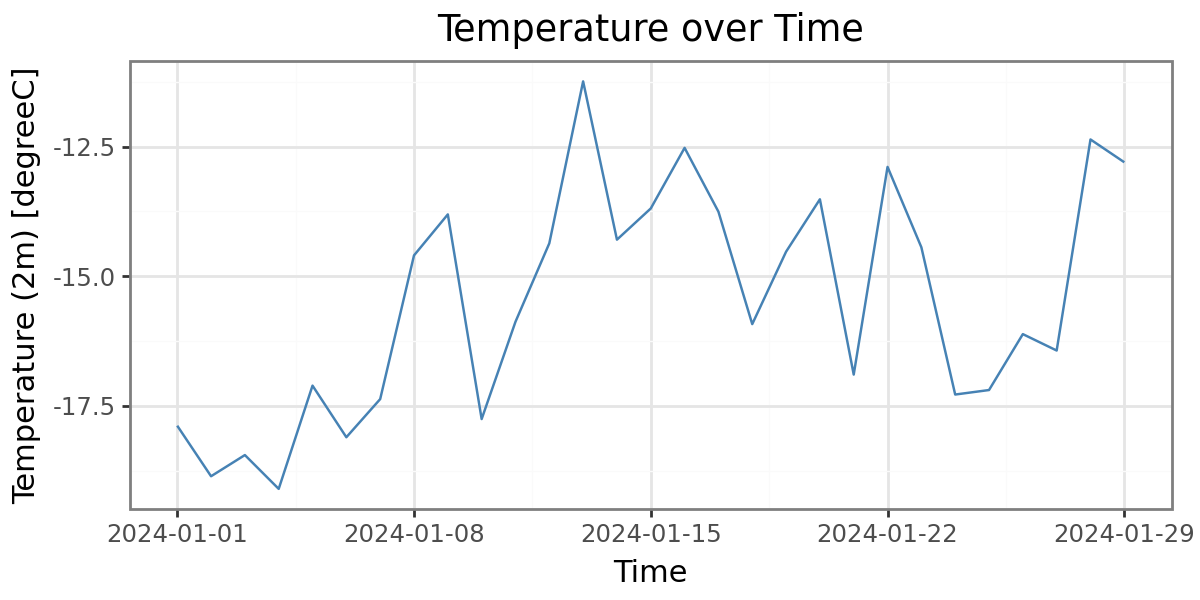

In [9]:
from  plotnine import*

# Plot using plotnine
p = (
    ggplot(df_ERA5_my_point_m1, aes(x='Date', y='temperature_2m')) +

    geom_line(color='steelblue') +
    # geom_point(size=2, color='darkblue') +
    labs(
        title='Temperature over Time',
        x='Time',
        y='Temperature (2m) [degreeC]'
    ) +
    theme_bw() +
    theme(figure_size=(6, 3))
)

p.show()